c1c[nH+]c[nH]1


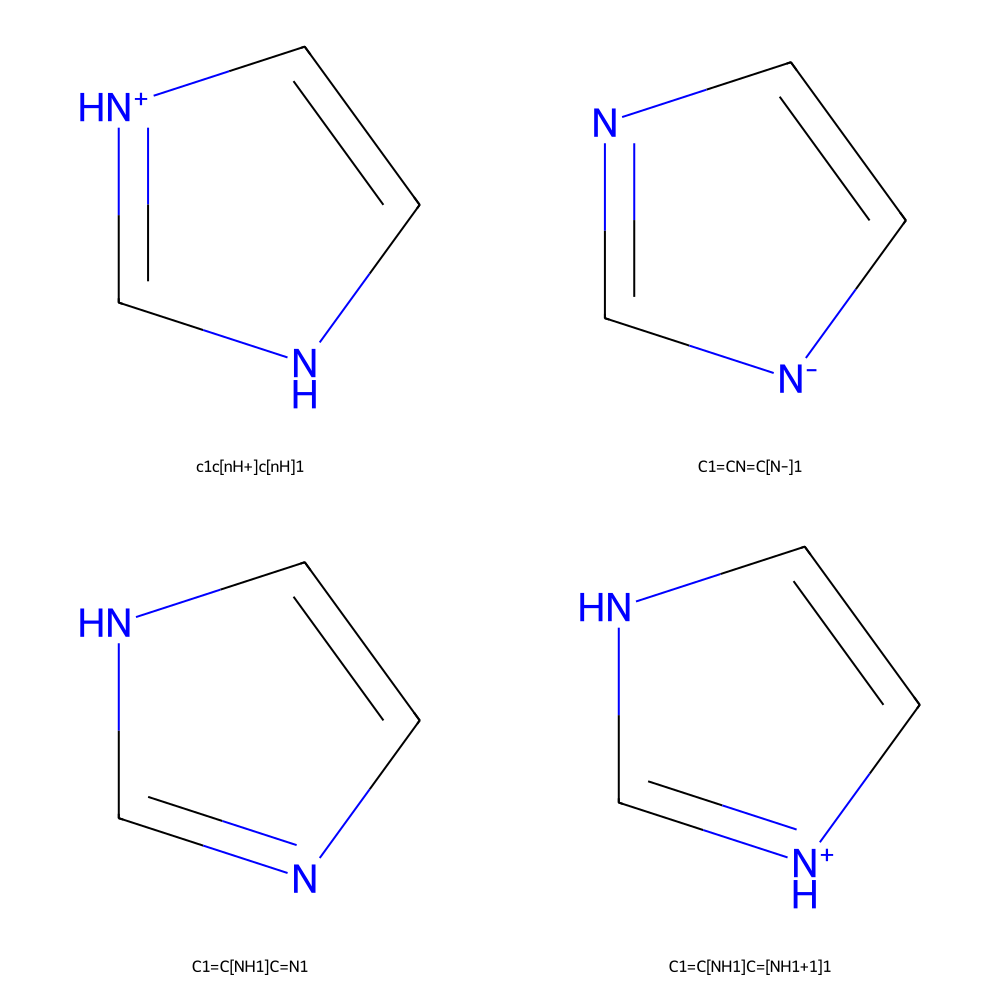

In [19]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, MACCSkeys
import matplotlib as mpl
import numpy as np

smis = ["c1c[nH+]c[nH]1", 
 "C1=CN=C[N-]1", 
 "C1=C[NH1]C=N1", 
 "C1=C[NH1]C=[NH1+1]1", 
]

mols = [Chem.MolFromSmiles(smi) for smi in smis]
#print(DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(mols[1], 2), AllChem.GetMorganFingerprint(mols[3], 2)))

print(Chem.MolToSmiles(mols[0], isomericSmiles=False))
img = Draw.MolsToGridImage(mols, legends=smis, molsPerRow=2, subImgSize=(500, 500))
display(img)

In [6]:
import selfies as sf
from rdkit import Chem, RDLogger, DataStructs
from rdkit.Chem import AllChem, MACCSkeys
RDLogger.DisableLog('rdApp.*')

def sim(mol1, mol2):
    if mol1 is None:
        return 0
    return DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(mol1, 2), AllChem.GetMorganFingerprint(mol2, 2))

gt2pred1 = {}
data1 = open("../assets/text2smi/molt5-large-smi.txt", "r").readlines()
for i in range(1, len(data1)):
    smi = data1[i].split("\t")[1]
    smi = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    gt2pred1[smi] = data1[i].strip().split("\t")[2]
data2 = open("../assets/text2smi/biot5-smi.txt", "r").readlines()
data3 = open("../assets/text2smi/molkformer-smi.txt", "r").readlines()
for i in range(1, len(data2)):
    text = data2[i].split("\t")[0]
    gt = data2[i].split("\t")[1]
    pred1 = gt2pred1[gt]
    pred2 = sf.decoder("".join(data2[i].strip().split("\t")[2].split(" ")))
    pred3 = sf.decoder("".join(data3[i].strip().split("\t")[2].split(" ")))

    mol1 = Chem.MolFromSmiles(pred1)
    mol2 = Chem.MolFromSmiles(pred2)
    mol3 = Chem.MolFromSmiles(pred3)
    molgt = Chem.MolFromSmiles(gt)
    sim1 = sim(mol1, molgt)
    sim2 = sim(mol2, molgt)
    sim3 = sim(mol3, molgt)
    if sim3 - sim2 > 0.05 and sim3 - sim1 > 0.05:
        print(i, text, "\n", sim1, sim2, sim3, "\n", gt, "\n", pred1, "\n", pred2, "\n", pred3, "\n")


2 The molecule is a branched amino tetrasaccharide consisting of N-acetyl-beta-D-glucosamine having two alpha-L-fucosyl residues at the 3- and 6-positions as well as an N-acetyl-beta-D-glucosaminyl residue at the 4-position. It has a role as a carbohydrate allergen. It is a glucosamine oligosaccharide and an amino tetrasaccharide. It derives from an alpha-L-Fucp-(1->3)-[alpha-L-Fucp-(1->6)]-beta-D-GlcpNAc. 
 0 0.4484848484848485 0.6038961038961039 
 CC(=O)N[C@@H]1[C@@H](O[C@@H]2O[C@@H](C)[C@@H](O)[C@@H](O)[C@@H]2O)[C@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H](CO[C@@H]2O[C@@H](C)[C@@H](O)[C@@H](O)[C@@H]2O)O[C@H]1O 
 C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[C@H]([C@@H]([C@H]([C@@H](O2)O)NC(=O)C)O[C@H]3[C@H]([C@@H]([C@@H]([C@@H](O3)C)O)O)O)O[C@H]4[C@H]([C@@H]([C@@H]([C@@H](O4)C)O)O)O)NC(=O)C)O)O)O 
 CC(=O)N[C@@H1][C@@H1](O[C@@H1]1O[C@@H1](C)[C@@H1](O)[C@@H1](O)[C@@H1]1O2)[C@H1]2O[C@@H1]3O[C@@H1](C)[C@@H1](O)[C@@H1](O)[C@@H1]3O[C@@H1]4O[C@@H1](C)[C@@H1](O)[C@@H1](O)[C@